<a href="https://colab.research.google.com/github/alexguttlein/OrgaDatos_TP2_MachineLearning/blob/main/TP2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
sales_train = pd.read_csv('sales_train.csv')
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')

# Análisis inicial de los datasets

## Campos de datasets

In [3]:
sales_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154.0,999.0,1.0
1,03.01.2013,0,25,2552.0,899.0,1.0


In [4]:
item_categories.head(2)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [5]:
items.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [6]:
shops.head(2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


## Unión de datasets

In [7]:
# se unen 'sales_train' con 'items' usando 'item_id'
merged = pd.merge(sales_train, items, on='item_id', how='outer')
merged.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0.0,59.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0
1,23.01.2013,0.0,24.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0
2,20.01.2013,0.0,27.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0
3,02.01.2013,0.0,25.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0
4,03.01.2013,0.0,25.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0


In [8]:
# se une el resultante anterior con 'item_categories' usando 'item_category_id'
merged = pd.merge(merged, item_categories, on='item_category_id', how='outer')
merged.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0.0,59.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0,Кино - Blu-Ray
1,23.01.2013,0.0,24.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0,Кино - Blu-Ray
2,20.01.2013,0.0,27.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0,Кино - Blu-Ray
3,02.01.2013,0.0,25.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0,Кино - Blu-Ray
4,03.01.2013,0.0,25.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0,Кино - Blu-Ray


In [9]:
# se une el resultante anterior con 'shops' usando 'shop_id'
merged = pd.merge(merged, shops, on='shop_id', how='outer')
merged.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0.0,59.0,22154.0,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37.0,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,16.02.2013,1.0,59.0,1112.0,499.0,1.0,9 (ДЕВЯТЬ) (BD),37.0,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,08.01.2013,0.0,59.0,21759.0,499.0,1.0,ЧУЖОЙ ПРОТИВ ХИЩНИКА (BD),37.0,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,05.02.2013,1.0,59.0,21861.0,149.0,1.0,ШЕРЛОК. СЕЗОН 2 (BD),37.0,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,26.01.2013,0.0,59.0,21347.0,549.0,1.0,ХИЖИНА В ЛЕСУ (BD),37.0,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


## Limpieza de dataset

In [36]:
merged.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [11]:
# se reemplazan los NaN de 'item_cnt_day' por 0
merged['item_cnt_day'].fillna(0, inplace=True)

In [37]:
merged.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [38]:
merged.count()

date                  399870
date_block_num        399870
shop_id               399870
item_id               399870
item_price            399870
item_cnt_day          399870
item_name             399870
item_category_id      399870
item_category_name    399870
shop_name             399870
dtype: int64

In [39]:
# se valida que los datos NaN provienen de los mismos 363 registros
merged.loc[merged['shop_id'].isna() | merged['shop_name'].isna() | merged['item_price'].isna() | merged['date'].isna() | merged['date_block_num'].isna()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name


In [40]:
# se filtran los 363 registros que contienen datos NaN
reg_nan = merged.loc[merged['shop_id'].isna() | merged['shop_name'].isna() | merged['item_price'].isna() | merged['date'].isna() | merged['date_block_num'].isna()]

In [41]:
# se eliminan los 363 registros con datos NaN ya que se considera que no va a afectar el resultado del analisis
merged.drop(reg_nan.index, inplace=True)

In [42]:
# se verifica que no quedan registros con valores NaN
merged.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [43]:
# se verifica que hay registros con cantidad de ventas negativas
item_cnt_day_negativo = merged.loc[merged['item_cnt_day'] < 0]
item_cnt_day_negativo['item_cnt_day'].count()

0

In [44]:
# se reemplaza las ventas negativas por 0
merged.loc[merged['item_cnt_day'] < 0, 'item_cnt_day'] = 0

# Visualizaciones

In [53]:
visu = merged.copy()

## Barplots

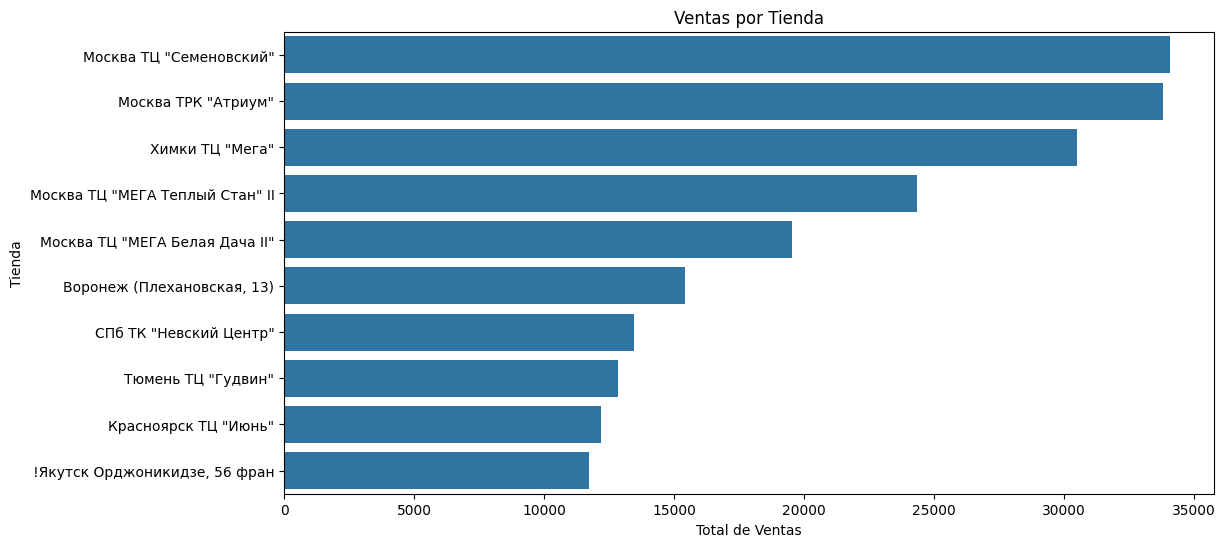

In [61]:
# Barplot de ventas por tienda
plt.figure(figsize=(12, 6))
ventas_por_tienda = visu.groupby('shop_name')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=ventas_por_tienda.values, y=ventas_por_tienda.index)
plt.title('Ventas por Tienda')
plt.xlabel('Total de Ventas')
plt.ylabel('Tienda')
plt.show()

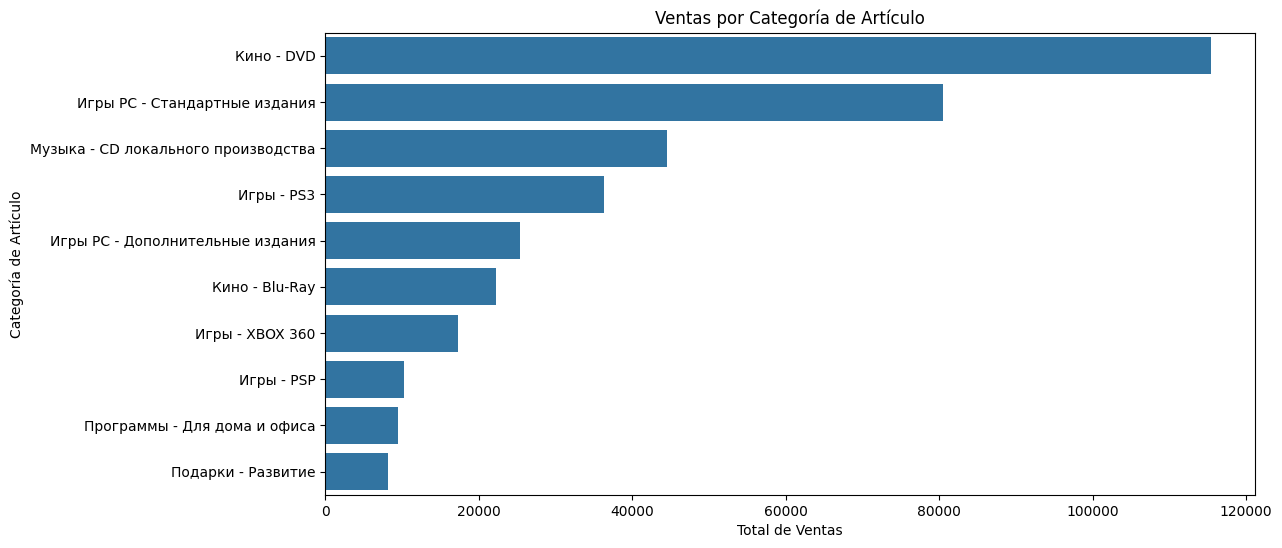

In [62]:
# Barplot de ventas por categoría de artículo
plt.figure(figsize=(12, 6))
ventas_por_categoria = visu.groupby('item_category_name')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=ventas_por_categoria.values, y=ventas_por_categoria.index)
plt.title('Ventas por Categoría de Artículo')
plt.xlabel('Total de Ventas')
plt.ylabel('Categoría de Artículo')
plt.show()

# Regresor Lineal

In [45]:
df = merged.copy()

In [46]:
# veo que columnas son categóricas
df.dtypes

date                   object
date_block_num        float64
shop_id               float64
item_id               float64
item_price            float64
item_cnt_day          float64
item_name              object
item_category_id      float64
item_category_name     object
shop_name              object
dtype: object

In [47]:
# elimino columnas categóricas que se consideran irrelevantes por tener id asociado
df.drop(['date', 'item_name', 'item_category_name', 'shop_name'], axis=1, inplace=True)

In [48]:
# se separa la variable a predecir
X = df.drop(['item_cnt_day'], axis=1)
y = df['item_cnt_day']

In [49]:
# se dividen los datos en train y test
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=27)

In [50]:
# se crea una instancia de regresión lineal y se entrena el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [51]:
# se hacen predicciones en el conjunto de prueba
y_pred = modelo.predict(X_validation)

In [52]:
# se evalúa el modelo utilizando la métrica MSE
mse = mean_squared_error(y_validation, y_pred)
mse

0.8219748525785271